In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

def normalize_data(data):
    return Normalizer().fit_transform(data)

def apply_pca(data, n=2):
    return PCA(n_components=n).fit_transform(data)

def transform_data(data):
    return np.log1p(data)

def transform_and_normalize(data):
    return normalize_data(transform_data(data))

def full_preprocessing(data):
    return apply_pca(transform_and_normalize(data))

def evaluate_clustering(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels)
    }

def try_clustering(method, X, n_clusters=3):
    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif method == "meanshift":
        model = MeanShift()
    else:
        return None
    labels = model.fit_predict(X)
    return evaluate_clustering(X, labels)

methods = {
    "No Processing": X.values,
    "Normalized": normalize_data(X),
    "Transformed": transform_data(X),
    "PCA": apply_pca(X),
    "T+N": transform_and_normalize(X),
    "T+N+PCA": full_preprocessing(X)
}

results = []

for method_name, processed_data in methods.items():
    for algo in ['kmeans', 'hierarchical', 'meanshift']:
        if algo == 'meanshift':
            metrics = try_clustering(algo, processed_data)
            results.append([method_name, algo, "-", metrics['Silhouette'], metrics['Calinski-Harabasz'], metrics['Davies-Bouldin']])
        else:
            for c in [3, 4, 5]:
                metrics = try_clustering(algo, processed_data, n_clusters=c)
                results.append([method_name, algo, c, metrics['Silhouette'], metrics['Calinski-Harabasz'], metrics['Davies-Bouldin']])

df_results = pd.DataFrame(results, columns=["Preprocessing", "Algorithm", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
print(df_results)


    Preprocessing     Algorithm Clusters  Silhouette  Calinski-Harabasz  \
0   No Processing        kmeans        3    0.559582         497.004876   
1   No Processing        kmeans        4    0.566948         696.839036   
2   No Processing        kmeans        5    0.508180         745.197429   
3   No Processing  hierarchical        3    0.564480         552.851712   
4   No Processing  hierarchical        4    0.560673         670.625991   
5   No Processing  hierarchical        5    0.507484         684.222613   
6   No Processing     meanshift        -    0.502492         454.058943   
7      Normalized        kmeans        3    0.523346         412.886077   
8      Normalized        kmeans        4    0.522030         519.457221   
9      Normalized        kmeans        5    0.493902         598.954264   
10     Normalized  hierarchical        3    0.503558         365.336647   
11     Normalized  hierarchical        4    0.468553         404.217919   
12     Normalized  hierar

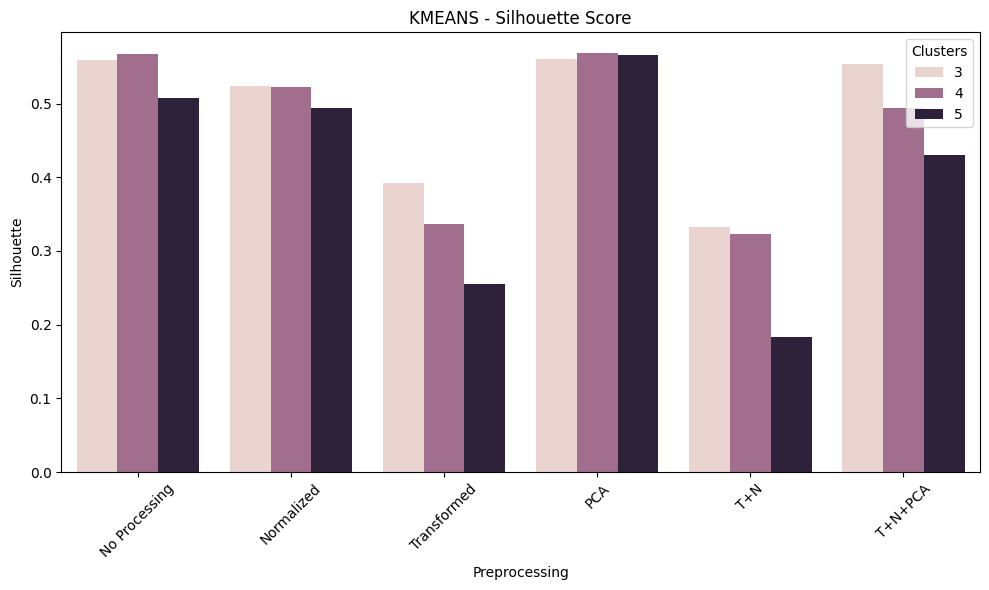

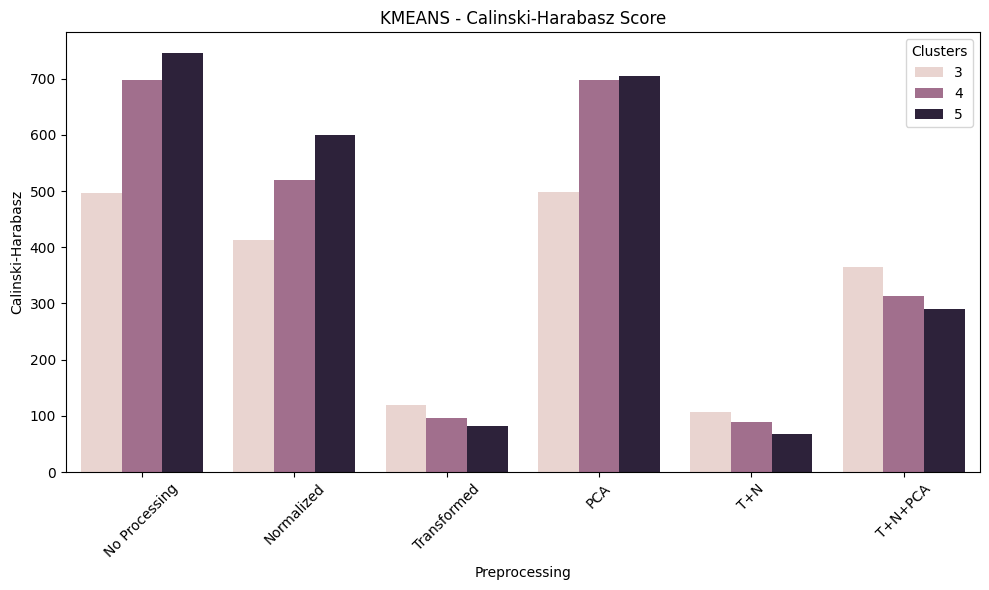

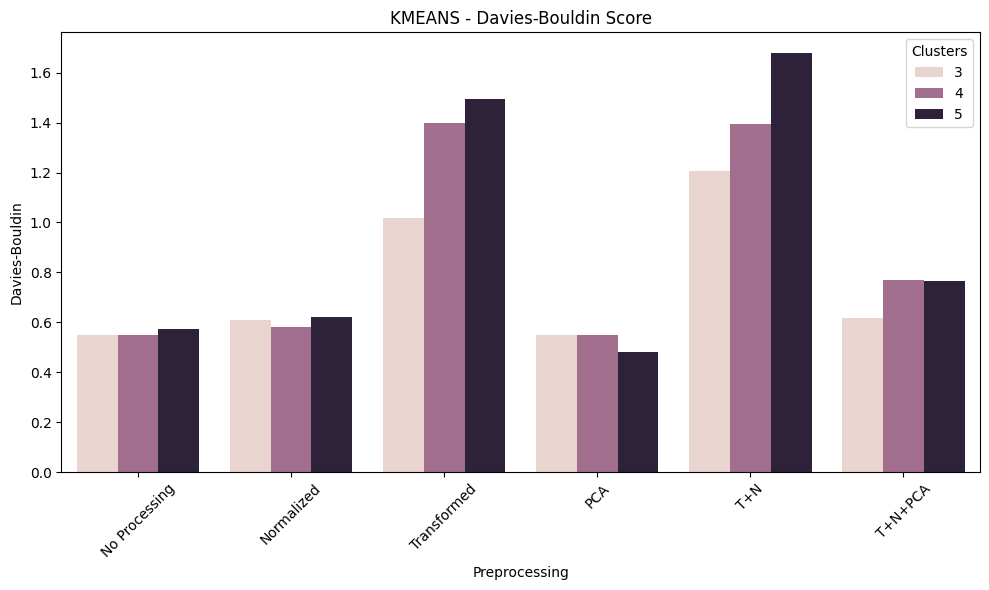

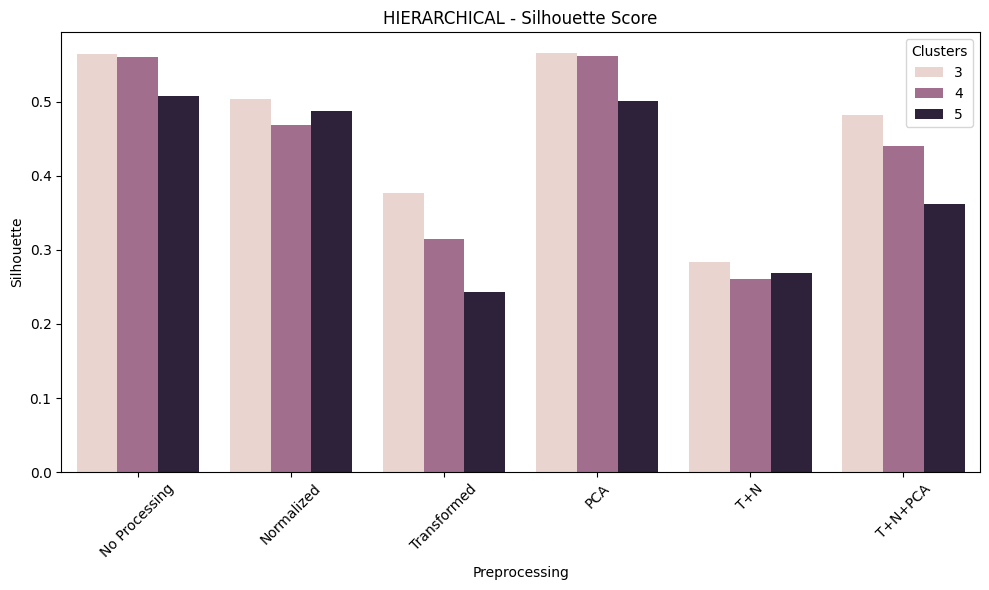

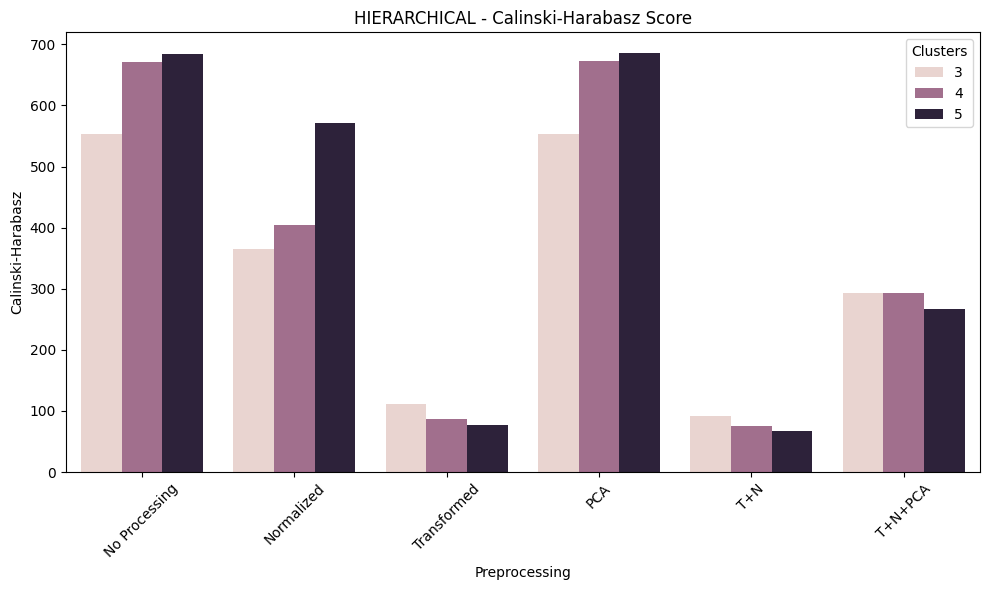

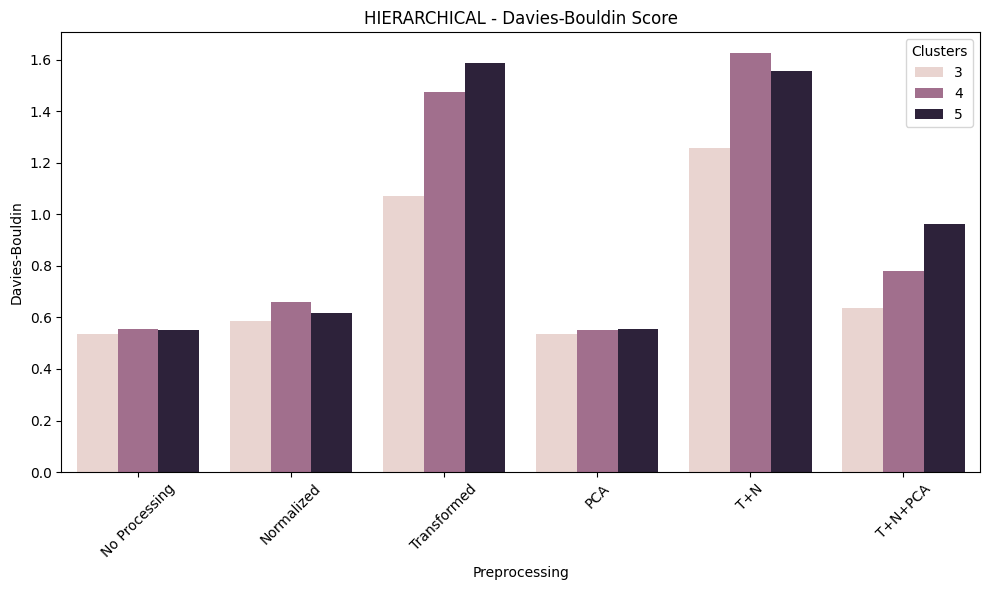

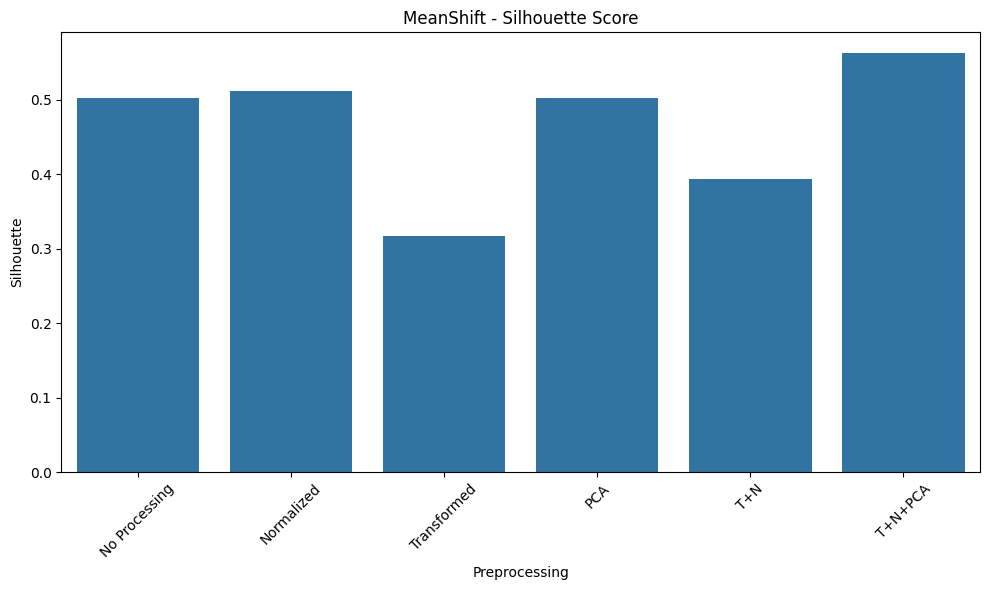

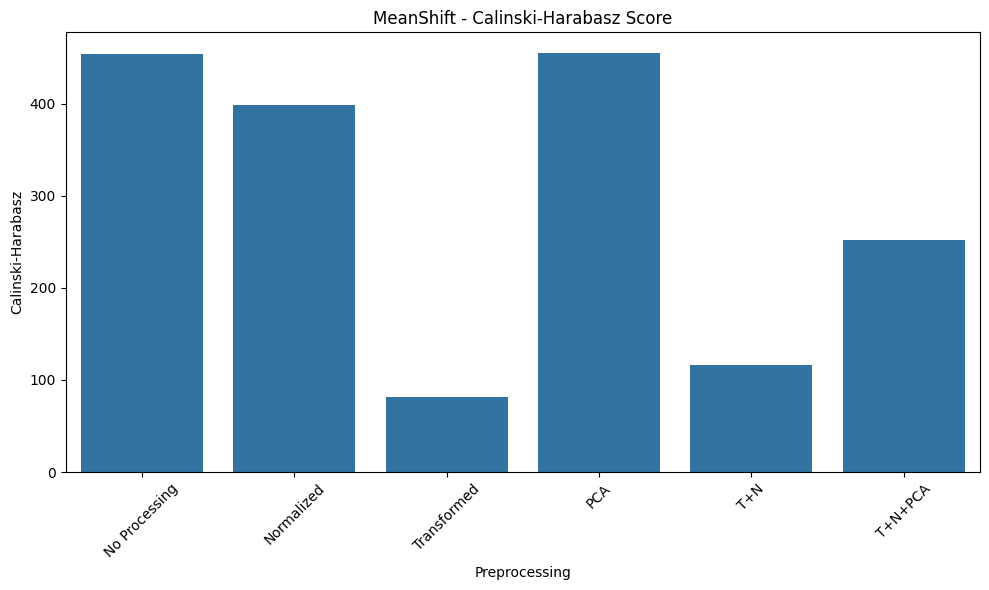

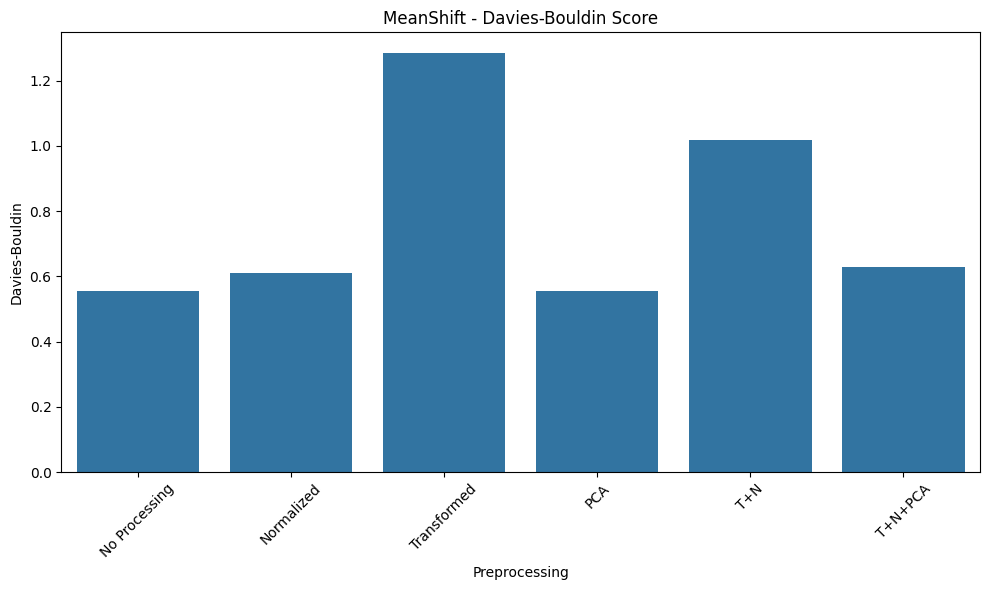

=== K-Means Clustering Results ===


,Preprocessing,Algorithm,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,No Processing,kmeans,3,0.559582,497.004876,0.549558
1,No Processing,kmeans,4,0.566948,696.839036,0.548666
2,No Processing,kmeans,5,0.508180,745.197429,0.574419
7,Normalized,kmeans,3,0.523346,412.886077,0.608082
8,Normalized,kmeans,4,0.522030,519.457221,0.580689
9,Normalized,kmeans,5,0.493902,598.954264,0.622222
14,Transformed,kmeans,3,0.391821,120.025162,1.018898
15,Transformed,kmeans,4,0.337233,95.945856,1.399817
16,Transformed,kmeans,5,0.254650,81.782015,1.495264
21,PCA,kmeans,3,0.560265,497.573525,0.548732


=== Hierarchical Clustering Results ===


,Preprocessing,Algorithm,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
3,No Processing,hierarchical,3,0.564480,552.851712,0.535734
4,No Processing,hierarchical,4,0.560673,670.625991,0.553574
5,No Processing,hierarchical,5,0.507484,684.222613,0.551315
10,Normalized,hierarchical,3,0.503558,365.336647,0.584662
11,Normalized,hierarchical,4,0.468553,404.217919,0.658890
12,Normalized,hierarchical,5,0.488245,571.975396,0.616038
17,Transformed,hierarchical,3,0.377289,111.985609,1.072687
18,Transformed,hierarchical,4,0.314883,87.370936,1.473524
19,Transformed,hierarchical,5,0.242794,76.955221,1.586243
24,PCA,hierarchical,3,0.565581,553.531654,0.534284


=== MeanShift Clustering Results ===


,Preprocessing,Algorithm,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
6,No Processing,meanshift,-,0.502492,454.058943,0.556150
13,Normalized,meanshift,-,0.512669,397.937953,0.611537
20,Transformed,meanshift,-,0.317306,81.569543,1.283705
27,PCA,meanshift,-,0.503221,454.540465,0.555116
34,T+N,meanshift,-,0.393367,115.995397,1.019101
41,T+N+PCA,meanshift,-,0.562720,251.450059,0.629068



### 📌 Conclusion

- **KMeans** performs best when PCA or full preprocessing (T+N+PCA) is applied. Especially for 3 clusters, silhouette and CH scores are highest with PCA.
- **Hierarchical Clustering** showed stability across configurations but performed slightly lower on Davies-Bouldin, especially with transformed data alone.
- **MeanShift** was relatively stable across preprocessing techniques. It doesn’t depend on the number of clusters but still benefited from PCA or normalization.
- **Best preprocessing** approach overall: `T+N+PCA`, especially with **KMeans** for structured and separated clusters.

> ✅ Recommendation: Use **KMeans with PCA or T+N+PCA** for high-dimensional datasets like the Wine dataset.


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_kmeans = df_results[df_results["Algorithm"] == "kmeans"]
df_hierarchical = df_results[df_results["Algorithm"] == "hierarchical"]
df_meanshift = df_results[df_results["Algorithm"] == "meanshift"]

def plot_metric(df, algorithm_name):
    metrics = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x="Preprocessing", y=metric, hue="Clusters")
        plt.title(f"{algorithm_name.upper()} - {metric} Score")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_metric(df_kmeans, "KMeans")
plot_metric(df_hierarchical, "Hierarchical")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_meanshift, x="Preprocessing", y="Silhouette")
plt.title("MeanShift - Silhouette Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_meanshift, x="Preprocessing", y="Calinski-Harabasz")
plt.title("MeanShift - Calinski-Harabasz Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_meanshift, x="Preprocessing", y="Davies-Bouldin")
plt.title("MeanShift - Davies-Bouldin Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("=== K-Means Clustering Results ===")
display(df_kmeans)

print("=== Hierarchical Clustering Results ===")
display(df_hierarchical)

print("=== MeanShift Clustering Results ===")
display(df_meanshift)

from IPython.display import Markdown

Markdown("""
### 📌 Conclusion

- **KMeans** performs best when PCA or full preprocessing (T+N+PCA) is applied. Especially for 3 clusters, silhouette and CH scores are highest with PCA.
- **Hierarchical Clustering** showed stability across configurations but performed slightly lower on Davies-Bouldin, especially with transformed data alone.
- **MeanShift** was relatively stable across preprocessing techniques. It doesn’t depend on the number of clusters but still benefited from PCA or normalization.
- **Best preprocessing** approach overall: `T+N+PCA`, especially with **KMeans** for structured and separated clusters.

> ✅ Recommendation: Use **KMeans with PCA or T+N+PCA** for high-dimensional datasets like the Wine dataset.
""")


In [3]:
def format_result_block(df, algorithm_name):
    subset = df[df["Algorithm"] == algorithm_name]
    pivoted = {}
    preprocessings = df["Preprocessing"].unique()

    for pre in preprocessings:
        block = []
        if algorithm_name != "meanshift":
            for c in [3, 4, 5]:
                row = subset[(subset["Preprocessing"] == pre) & (subset["Clusters"] == c)]
                if not row.empty:
                    r = row.iloc[0]
                    block.append(f"{r['Silhouette']:.2f} / {int(r['Calinski-Harabasz'])} / {r['Davies-Bouldin']:.2f}")
                else:
                    block.append("NA")
        else:
            row = subset[subset["Preprocessing"] == pre]
            if not row.empty:
                r = row.iloc[0]
                block = [f"{r['Silhouette']:.2f} / {int(r['Calinski-Harabasz'])} / {r['Davies-Bouldin']:.2f}"] * 3
            else:
                block = ["NA"] * 3
        pivoted[pre] = block

    result_df = pd.DataFrame(pivoted, index=["c=3", "c=4", "c=5"])
    return result_df

print("=== Using K-Means Clustering ===")
display(format_result_block(df_results, "kmeans"))

print("\n=== Using Hierarchical Clustering ===")
display(format_result_block(df_results, "hierarchical"))

print("\n=== Using Mean Shift Clustering ===")
display(format_result_block(df_results, "meanshift"))

=== Using K-Means Clustering ===


,No Processing,Normalized,Transformed,PCA,T+N,T+N+PCA
c=3,0.56 / 497 / 0.55,0.52 / 412 / 0.61,0.39 / 120 / 1.02,0.56 / 497 / 0.55,0.33 / 106 / 1.21,0.55 / 365 / 0.62
c=4,0.57 / 696 / 0.55,0.52 / 519 / 0.58,0.34 / 95 / 1.40,0.57 / 698 / 0.55,0.32 / 89 / 1.39,0.49 / 313 / 0.77
c=5,0.51 / 745 / 0.57,0.49 / 598 / 0.62,0.25 / 81 / 1.50,0.57 / 705 / 0.48,0.18 / 66 / 1.68,0.43 / 290 / 0.76



=== Using Hierarchical Clustering ===


,No Processing,Normalized,Transformed,PCA,T+N,T+N+PCA
c=3,0.56 / 552 / 0.54,0.50 / 365 / 0.58,0.38 / 111 / 1.07,0.57 / 553 / 0.53,0.28 / 91 / 1.26,0.48 / 293 / 0.64
c=4,0.56 / 670 / 0.55,0.47 / 404 / 0.66,0.31 / 87 / 1.47,0.56 / 672 / 0.55,0.26 / 75 / 1.62,0.44 / 292 / 0.78
c=5,0.51 / 684 / 0.55,0.49 / 571 / 0.62,0.24 / 76 / 1.59,0.50 / 685 / 0.56,0.27 / 67 / 1.56,0.36 / 267 / 0.96



=== Using Mean Shift Clustering ===


,No Processing,Normalized,Transformed,PCA,T+N,T+N+PCA
c=3,0.50 / 454 / 0.56,0.51 / 397 / 0.61,0.32 / 81 / 1.28,0.50 / 454 / 0.56,0.39 / 115 / 1.02,0.56 / 251 / 0.63
c=4,0.50 / 454 / 0.56,0.51 / 397 / 0.61,0.32 / 81 / 1.28,0.50 / 454 / 0.56,0.39 / 115 / 1.02,0.56 / 251 / 0.63
c=5,0.50 / 454 / 0.56,0.51 / 397 / 0.61,0.32 / 81 / 1.28,0.50 / 454 / 0.56,0.39 / 115 / 1.02,0.56 / 251 / 0.63
